In [1]:
import numpy as np
from numpy.random import multivariate_normal
from multiview.cluster.mv_k_means import MultiviewKMeans
from sklearn.metrics import normalized_mutual_info_score as nmi_score
import matplotlib.pyplot as plt

##### Creating a positive control dataset where Multi-view kmeans should easily separate the underlying clusters

In [2]:
# Create positive control dataset comprised of a 3 component gaussian mixture 
# model in two views. Multiview kmeans should easily cluster the points produced 
# by each gaussian mixture component into their true groups.

def get_pos_data(n_samples = 500):
    c1_means = [[1, -3],[4, -3]]
    c2_means = [[6, 6],[-7, -5]]
    c3_means = [[-4, 7.5],[3, 9]]
    c1_cov = list()
    c1_cov.append([[1, 0.5],[0.5, 0.7]])
    c1_cov.append([[1, -0.2],[-0.2, 1]])
    c2_cov = list()
    c2_cov.append([[0.5, -0.2],[-0.2, 1]])
    c2_cov.append([[0.6, 0.2],[0.2, 1]])
    c3_cov = list()
    c3_cov.append([[0.6, 0.1],[0.1, 0.5]])
    c3_cov.append([[1, 0.4],[0.4, 0.7]])
    means = [c1_means, c2_means, c3_means]
    cov = [c1_cov, c2_cov, c3_cov]
    v_data =  [[],[]]
    
    for co in range(3):
        for vi in range(2):
            samples = multivariate_normal(means[co][vi], cov[co][vi], n_samples)
            v_data[vi].append(samples)
            
    for vi in range(2):
        v_data[vi] = np.vstack(v_data[vi])
    
    labels = np.concatenate((np.zeros((n_samples,)), np.ones((n_samples,)), 2 *np.ones((n_samples,))))
    
    shuffle_inds = np.random.permutation(n_samples* 3)
    for vi in range(2):
        v_data[vi] = v_data[vi][shuffle_inds]
    labels = labels[shuffle_inds]
    
    return v_data, labels

In [3]:
p_data, p_labels = get_pos_data()

##### Displaying the true cluster components for each view

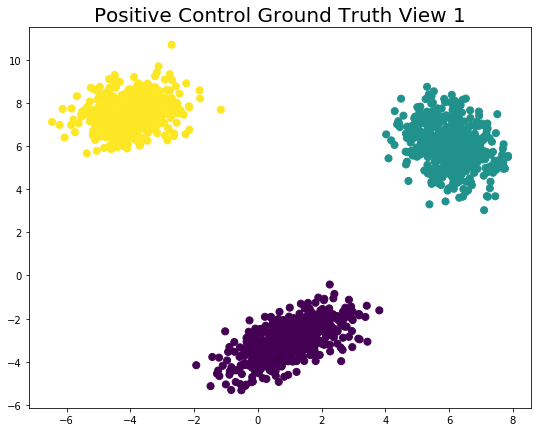

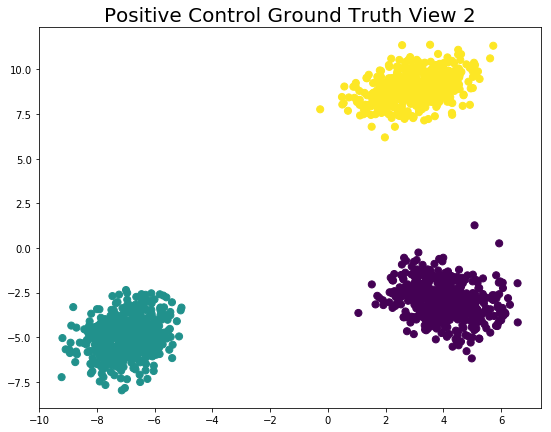

In [4]:
fig, ax = plt.subplots(figsize=(9,7))
cmap = 'viridis'
dot_size=50
ax.set_title('Positive Control Ground Truth View 1', size=20)
ax.scatter(p_data[0][:, 0], p_data[0][:, 1], c=p_labels,s=dot_size, cmap=cmap)

fig, ax = plt.subplots(figsize=(9,7))
cmap = 'viridis'
dot_size=50
ax.set_title('Positive Control Ground Truth View 2', size=20)
ax.scatter(p_data[1][:, 0], p_data[1][:, 1],c=p_labels,s=dot_size, cmap=cmap)

##### Evaluating cluster purity with respect to normalized mutal information

In [5]:
# Clustering positive control data and plotting the resulting clusters
mv_kmeans = MultiviewKMeans(k=3)
p_clusters = mv_kmeans.fit_predict(p_data)

# Compute the normalized mutual information score between the
# cluster labels and true labels. Expected score is ~ 1.0 for perfect
# correspondence between true labels and cluster assignments. 
nmi = nmi_score(p_clusters, p_labels)
print('The normalized mutual information score is: ' + str(nmi))

The normalized mutual information score is: 0.6520627076163906


##### Displaying the clustering results in each view

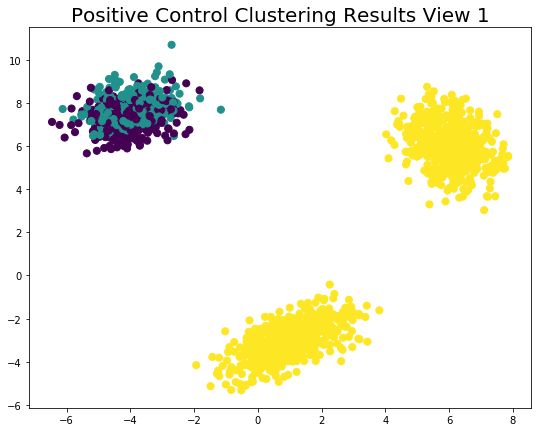

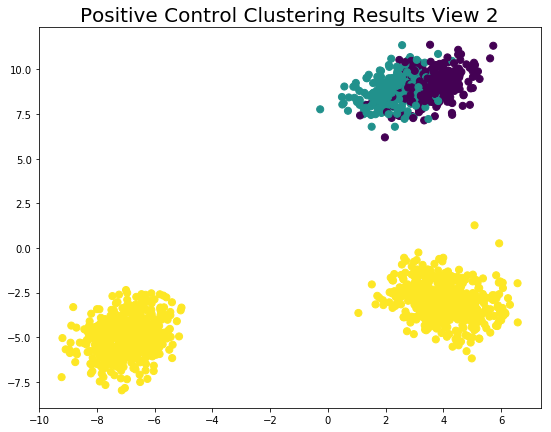

In [6]:
fig, ax = plt.subplots(figsize=(9,7))
cmap = 'viridis'
dot_size=50
ax.set_title('Positive Control Clustering Results View 1', size=20)
ax.scatter(p_data[0][:, 0], p_data[0][:, 1], c=p_clusters,s=dot_size, cmap=cmap)

fig, ax = plt.subplots(figsize=(9,7))
cmap = 'viridis'
dot_size=50
ax.set_title('Positive Control Clustering Results View 2', size=20)
ax.scatter(p_data[1][:, 0], p_data[1][:, 1],c=p_clusters,s=dot_size, cmap=cmap)

##### Creating a negative control dataset where Multi-view kmeans cannot separate the underlying clusters

In [7]:
# Create negative control dataset comprised of a 3 component gaussian mixture 
# model in two views. Multiview kmeans should not be able to
# effectively cluster

def get_neg_data(n_samples = 500):
    c1_means = [[1, 1],[4, -3]]
    c2_means = [[1.5, 1.2],[4.5, -3]]
    c3_means = [[0, 2],[5, -2]]
    c1_cov = list()
    c1_cov.append([[1, 0.5],[0.5, 0.7]])
    c1_cov.append([[1, -0.2],[-0.2, 1]])
    c2_cov = list()
    c2_cov.append([[0.5, -0.2],[-0.2, 1]])
    c2_cov.append([[0.6, 0.2],[0.2, 1]])
    c3_cov = list()
    c3_cov.append([[0.6, 0.1],[0.1, 0.5]])
    c3_cov.append([[1, 0.4],[0.4, 0.7]])
    means = [c1_means, c2_means, c3_means]
    cov = [c1_cov, c2_cov, c3_cov]
    v_data =  [[],[]]
    
    for co in range(3):
        for vi in range(2):
            samples = multivariate_normal(means[co][vi], cov[co][vi], n_samples)
            v_data[vi].append(samples)
            
    for vi in range(2):
        v_data[vi] = np.vstack(v_data[vi])
    
    labels = np.concatenate((np.zeros((n_samples,)), np.ones((n_samples,)), 2 *np.ones((n_samples,))))
    
    shuffle_inds = np.random.permutation(n_samples* 3)
    for vi in range(2):
        v_data[vi] = v_data[vi][shuffle_inds]
    labels = labels[shuffle_inds]
    
    return v_data, labels

In [8]:
n_data, n_labels = get_neg_data()

##### Displaying the true cluster components for each view

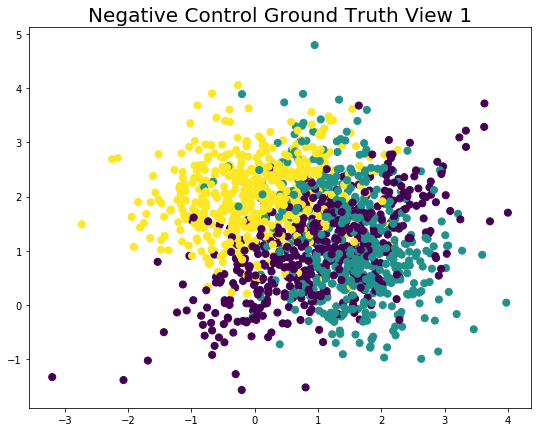

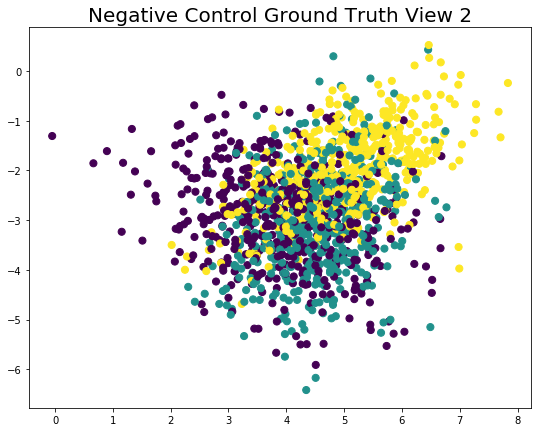

In [9]:
fig, ax = plt.subplots(figsize=(9,7))
cmap = 'viridis'
dot_size=50
ax.set_title('Negative Control Ground Truth View 1', size=20)
ax.scatter(n_data[0][:, 0], n_data[0][:, 1], c=n_labels,s=dot_size, cmap=cmap)

fig, ax = plt.subplots(figsize=(9,7))
cmap = 'viridis'
dot_size=50
ax.set_title('Negative Control Ground Truth View 2', size=20)
ax.scatter(n_data[1][:, 0], n_data[1][:, 1],c=n_labels,s=dot_size, cmap=cmap)

##### Evaluating cluster purity with respect to normalized mutal information

In [10]:
# Clustering positive control data and plotting the resulting clusters
mv_kmeans = MultiviewKMeans(k=3)
n_clusters = mv_kmeans.fit_predict(p_data)

# Compute the normalized mutual information score between the
# cluster labels and true labels. Expected score is << 1.0 for low
# correspondence between true labels and cluster assignments. 
nmi = nmi_score(n_clusters, n_labels)
print('The normalized mutual information score is: ' + str(nmi))

The normalized mutual information score is: 0.0013480964419334159


##### Displaying the clustering results in each view

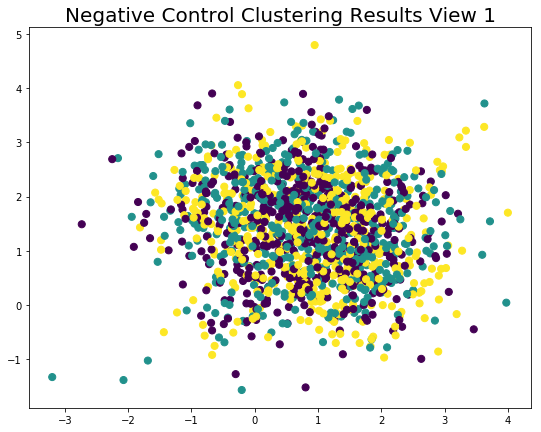

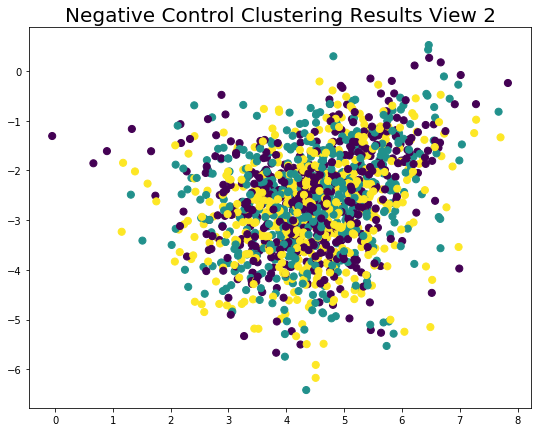

In [11]:
fig, ax = plt.subplots(figsize=(9,7))
cmap = 'viridis'
dot_size=50
ax.set_title('Negative Control Clustering Results View 1', size=20)
ax.scatter(n_data[0][:, 0], n_data[0][:, 1], c=n_clusters,s=dot_size, cmap=cmap)

fig, ax = plt.subplots(figsize=(9,7))
cmap = 'viridis'
dot_size=50
ax.set_title('Negative Control Clustering Results View 2', size=20)
ax.scatter(n_data[1][:, 0], n_data[1][:, 1],c=n_clusters,s=dot_size, cmap=cmap)